In [28]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
import pandas as pd


%matplotlib inline

plt.style.use('ggplot')

In [29]:
df_import = pd.read_csv('Provider_Info.csv')
df_import.head(1)

,Federal Provider Number,Provider Name,Provider Address,Provider City,Provider State,Provider Zip Code,Provider Phone Number,Provider SSA County Code,Provider County Name,Ownership Type,...,Rating Cycle 3 Total Health Score,Total Weighted Health Survey Score,Number of Facility Reported Incidents,Number of Substantiated Complaints,Number of Fines,Total Amount of Fines in Dollars,Number of Payment Denials,Total Number of Penalties,Location,Processing Date
0,015019,MERRY WOOD LODGE CARE AND REHABILITATION CENTER,P O BOX 130,ELMORE,AL,36025,3345678484,250,Elmore,For profit - Corporation,...,16,291.667,1,2,1,78677.0,0,1,130 ELMORE AL 36025,08/01/2019


In [30]:
#About the dataset

#When data was processed/published
print('Published {}'.format(df_import['Processing Date'].unique()))

#Amount of features in the dataset
row_count = len(df_import.axes[0])
col_count = len(df_import.axes[1])
print('{} entries'.format(row_count))
print('{} features'. format(col_count))

Published ['08/01/2019']
15512 entries
85 features


In [31]:
#Figure out column names

for idx, column in enumerate(list(df_import.columns)):
    print (idx, column)

0 Federal Provider Number
1 Provider Name
2 Provider Address
3 Provider City
4 Provider State
5 Provider Zip Code
6 Provider Phone Number
7 Provider SSA County Code
8 Provider County Name
9 Ownership Type
10 Number of Certified Beds
11 Average Number of Residents Per Day
12 Provider Type
13 Provider Resides in Hospital
14 Legal Business Name
15 Date First Approved to Provide Medicare and Medicaid services
16 Continuing Care Retirement Community
17 Special Focus Status
18 Most Recent Health Inspection More Than 2 Years Ago
19 Provider Changed Ownership in Last 12 Months
20 With a Resident and Family Council
21 Automatic Sprinkler Systems in All Required Areas
22 Overall Rating
23 Overall Rating Footnote
24 Health Inspection Rating
25 Health Inspection Rating Footnote
26 QM Rating
27 QM Rating Footnote
28 Long-Stay QM Rating
29 Long-Stay QM Rating Footnote
30 Short-Stay QM Rating
31 Short-Stay QM Rating Footnote
32 Staffing Rating
33 Staffing Rating Footnote
34 RN Staffing Rating
35 RN S

In [32]:
#Create a new database with only QM ratings


QM_cols = [i for i in list(df_import.columns) if 'QM' in i]
#print(QM_cols)
QM_df = df_import.loc[:, ['Provider Name','QM Rating']]
QM_df.head(1)

,Provider Name,QM Rating
0,MERRY WOOD LODGE CARE AND REHABILITATION CENTER,1.0


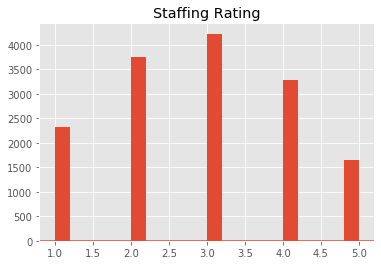

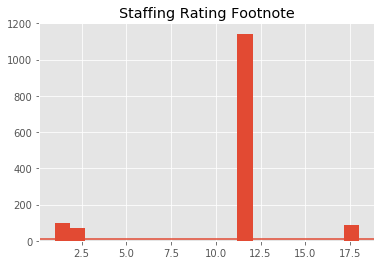

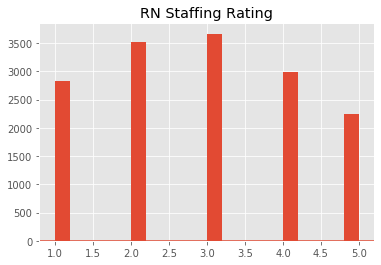

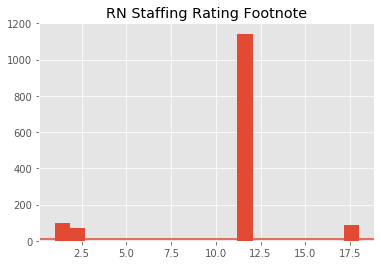

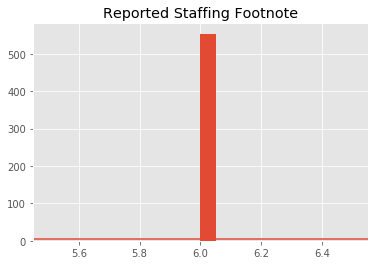

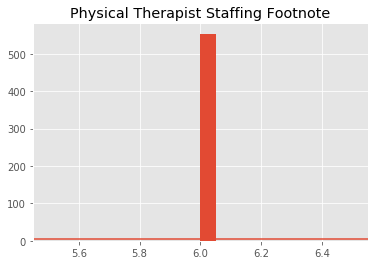

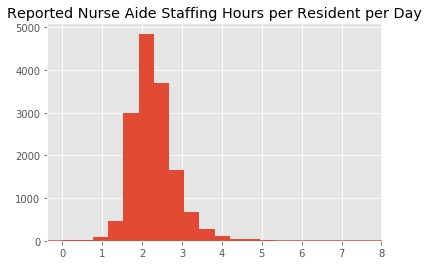

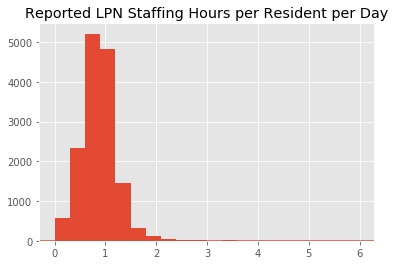

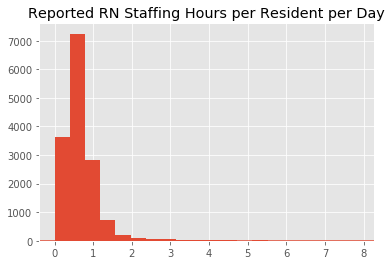

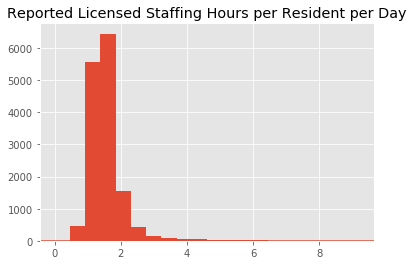

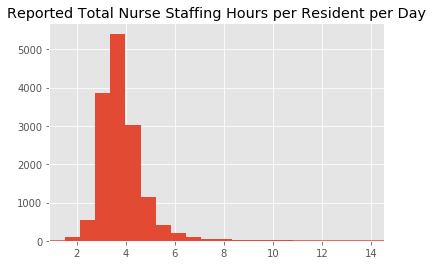

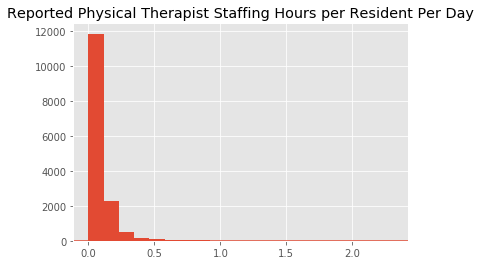

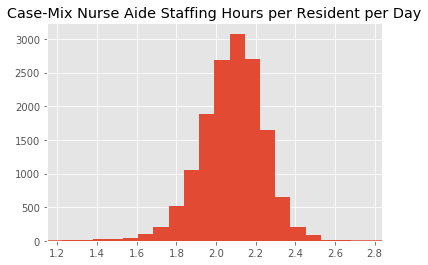

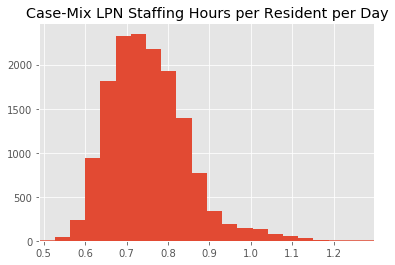

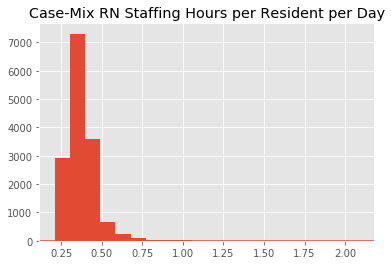

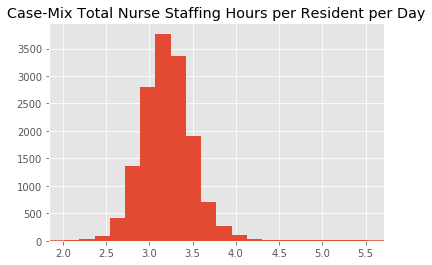

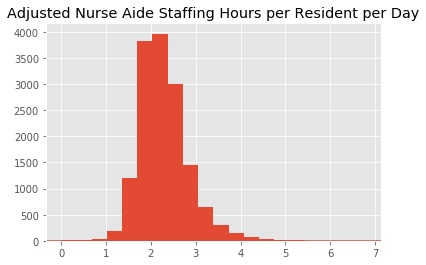

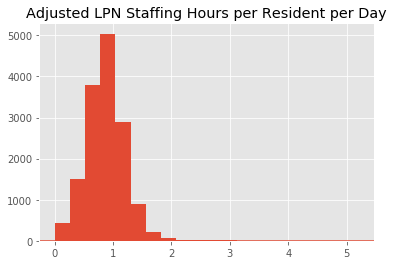

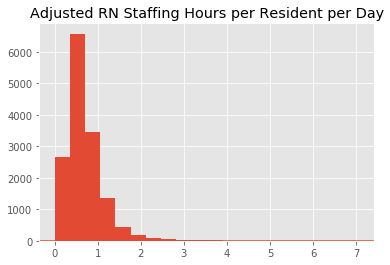

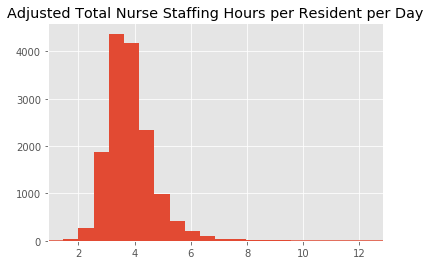

In [91]:
#Create a new database with only staffing features

staffing_cols = [i for i in list(df_import.columns) if 'Staffing' in i]
#print(staffing_cols)
staffing_df = df_import.loc[:,  df_import.columns.isin(staffing_cols)]

staffing_df.head(1)

#Histogram of all staffing columns
for i in staffing_cols:
    cols = staffing_df[i]
    fig, ax = plt.subplots()
    ax.set_title(i)
    ax.hist(cols, bins=20)
    ax.axhline(np.mean(cols))

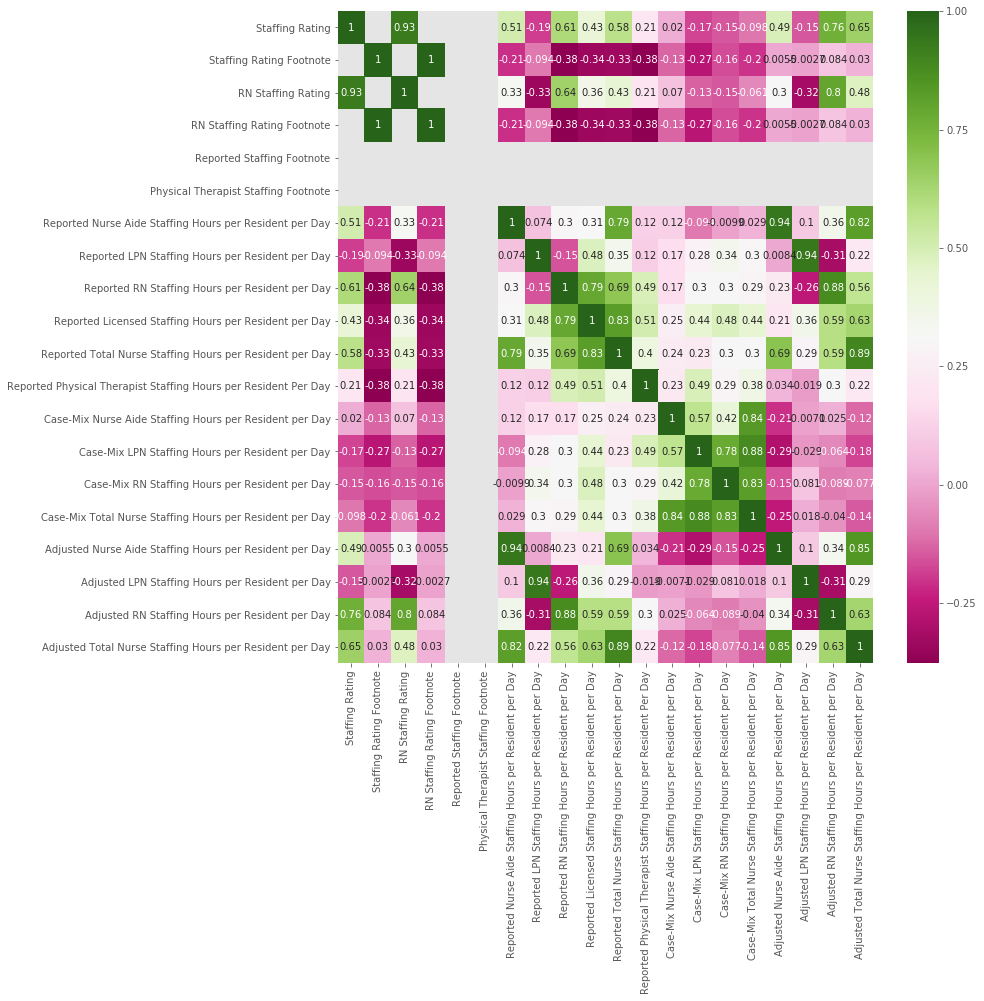

In [102]:
plt.figure(figsize=(12,12))
sns.heatmap(staffing_df.corr(), cmap="PiYG", annot=True);

In [103]:
#Create a new database with only important staffing features

staffing_df = df_import.loc[:, ['Provider Name', 'Staffing Rating','Adjusted Total Nurse Staffing Hours per Resident per Day']]

staffing_df.head(1)

,Provider Name,Staffing Rating,Adjusted Total Nurse Staffing Hours per Resident per Day
0,MERRY WOOD LODGE CARE AND REHABILITATION CENTER,3.0,3.51011


/home/lea/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:29: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


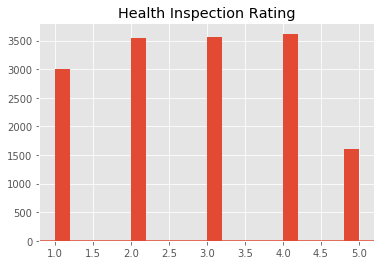

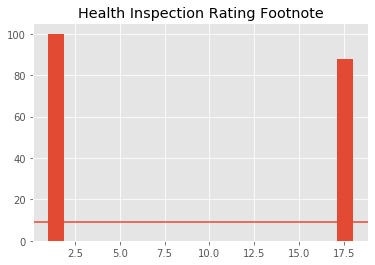

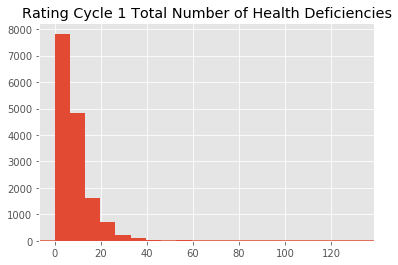

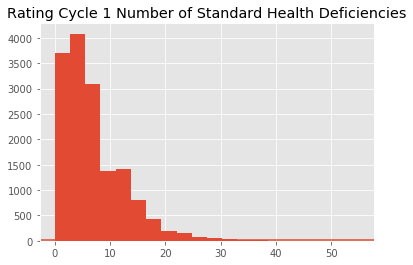

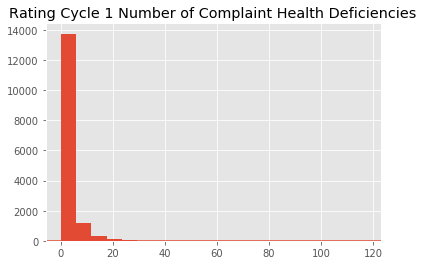

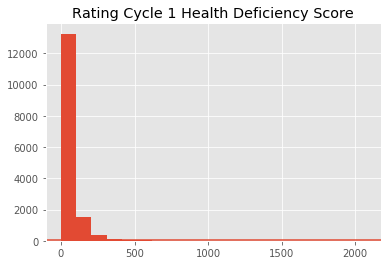

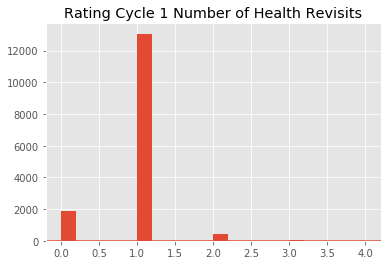

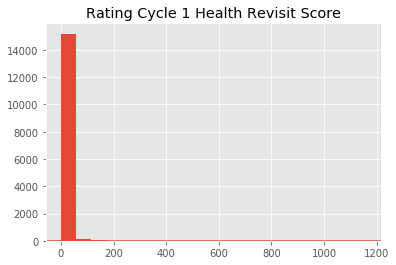

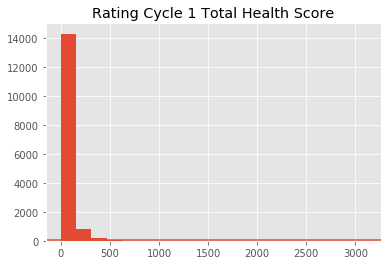

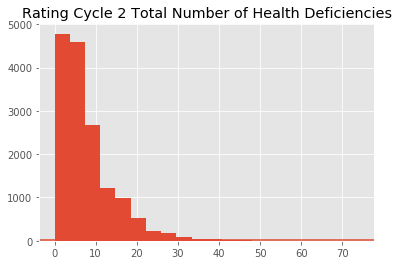

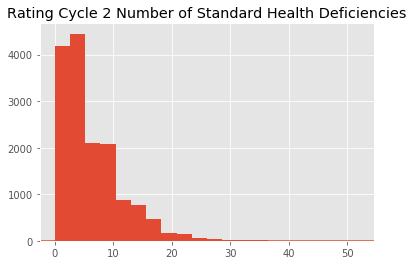

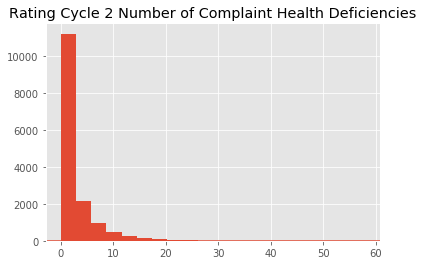

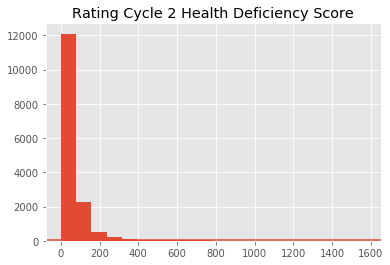

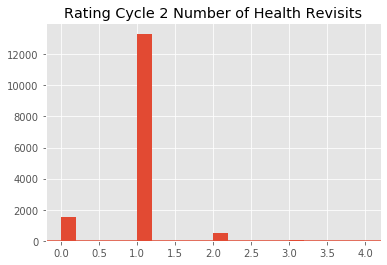

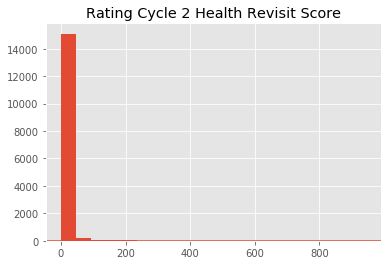

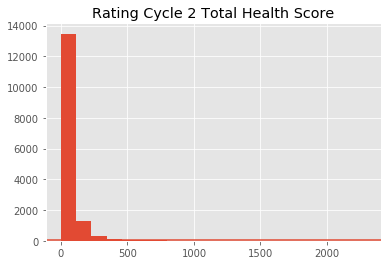

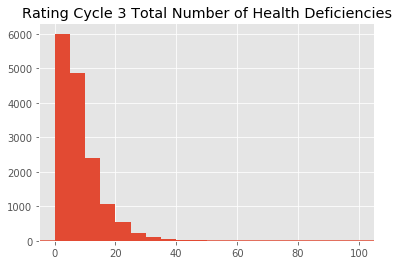

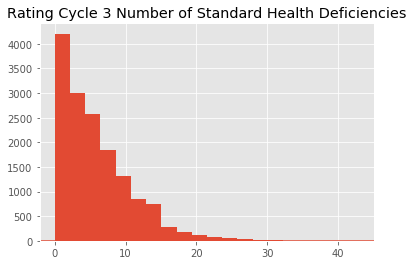

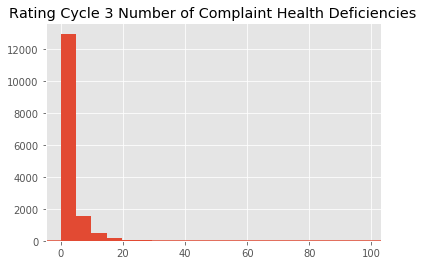

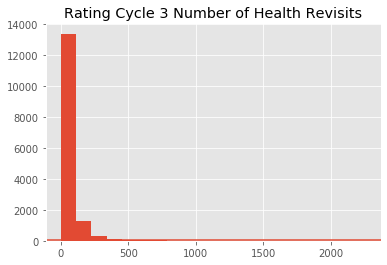

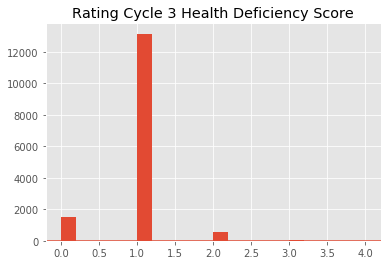

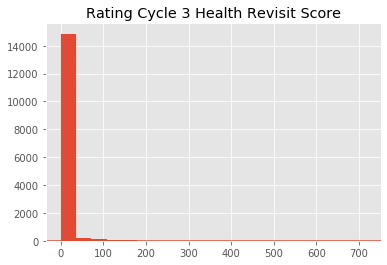

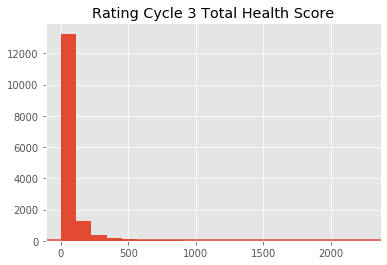

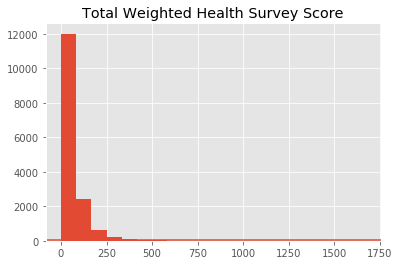

In [106]:
#Create a new database with only health inspection features

inspection_cols = [i for i in list(df_import_replace.columns) if 'Health' in i]
#print(inspection_cols)
inspection_df = df_import_replace.loc[:,  df_import_replace.columns.isin(inspection_cols)]
inspection_replace = inspection_df.applymap(lambda x: 0 if x=="." else x)
inspection_replace



inspection_replace.dtypes

#change data types
inspection_replace['Rating Cycle 2 Number of Standard Health Deficiencies'] = pd.to_numeric(inspection_replace['Rating Cycle 2 Number of Standard Health Deficiencies'])
inspection_replace['Rating Cycle 2 Total Number of Health Deficiencies'] = pd.to_numeric(inspection_replace['Rating Cycle 2 Total Number of Health Deficiencies'])
inspection_replace['Rating Cycle 3 Total Number of Health Deficiencies'] = pd.to_numeric(inspection_replace['Rating Cycle 3 Total Number of Health Deficiencies'])
inspection_replace['Rating Cycle 3 Number of Standard Health Deficiencies'] = pd.to_numeric(inspection_replace['Rating Cycle 3 Number of Standard Health Deficiencies'])
inspection_replace['Rating Cycle 3 Number of Health Revisits'] = pd.to_numeric(inspection_replace['Rating Cycle 3 Number of Health Revisits'])
inspection_replace['Rating Cycle 3 Number of Complaint Health Deficiencies'] = pd.to_numeric(inspection_replace['Rating Cycle 3 Number of Complaint Health Deficiencies'])
inspection_replace['Rating Cycle 3 Health Deficiency Score'] = pd.to_numeric(inspection_replace['Rating Cycle 3 Health Deficiency Score'])
inspection_replace['Rating Cycle 3 Health Revisit Score'] = pd.to_numeric(inspection_replace['Rating Cycle 3 Health Revisit Score'])
inspection_replace['Rating Cycle 3 Total Health Score'] = pd.to_numeric(inspection_replace['Rating Cycle 3 Total Health Score'])



#Histogram of all staffing columns
for i in inspection_replace.select_dtypes(include=['float64']):
    cols = inspection_replace[i]
    fig, ax = plt.subplots()
    ax.set_title(i)
    ax.hist(cols, bins=20)
    ax.axhline(np.mean(cols))


        

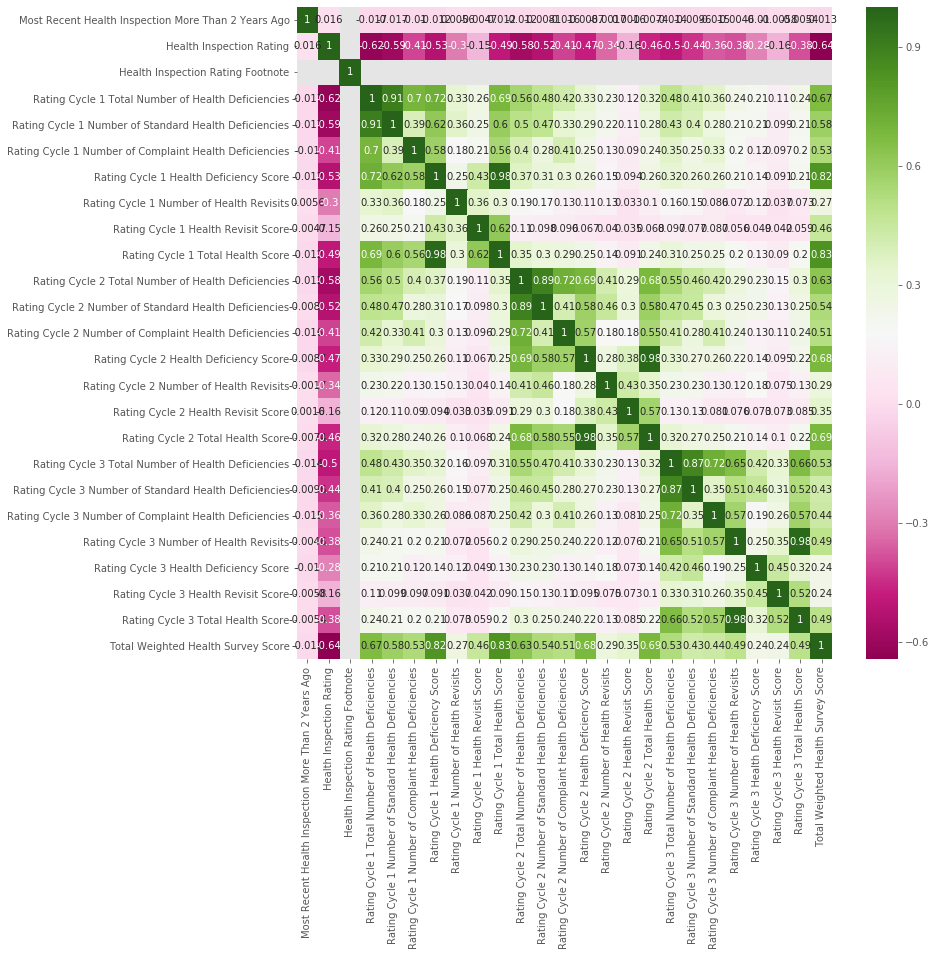

In [108]:
plt.figure(figsize=(12,12))
sns.heatmap(inspection_replace.corr(), cmap="PiYG", annot=True);

In [78]:
#Create a new database with only health inspection features

health_df = df_import.loc[:, ['Provider Name', 'Health Inspection Rating','Total Weighted Health Survey Score']]

health_df.head(1)


,Provider Name,Health Inspection Rating,Total Weighted Health Survey Score
0,MERRY WOOD LODGE CARE AND REHABILITATION CENTER,1.0,291.667


In [80]:
#Merge tables with all pertinent columns

merge1 = QM_df.merge(staffing_df, on='Provider Name')
merged_df = merge1.merge(health_df, on='Provider Name')
merged_df.head()

,Provider Name,QM Rating,Staffing Rating,Adjusted Total Nurse Staffing Hours per Resident per Day,Health Inspection Rating,Total Weighted Health Survey Score
0,MERRY WOOD LODGE CARE AND REHABILITATION CENTER,1.0,3.0,3.51011,1.0,291.667
1,SUMMERFORD NURSING HOME INC,3.0,3.0,3.43516,1.0,72.167
2,CLAY COUNTY NURSING HOME,5.0,NaN,NaN,3.0,20.667
3,HENDRIX HEALTH AND REHABILITATION,4.0,2.0,3.26946,3.0,18.667
4,"LINEVILLE HEALTH AND REHABILITATION, LLC",4.0,3.0,4.18192,4.0,14.000


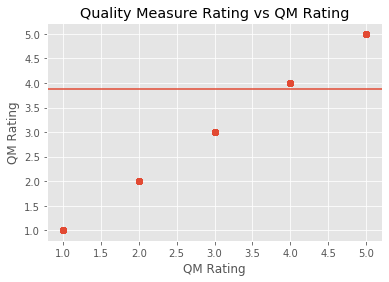

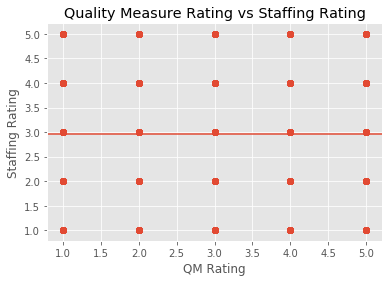

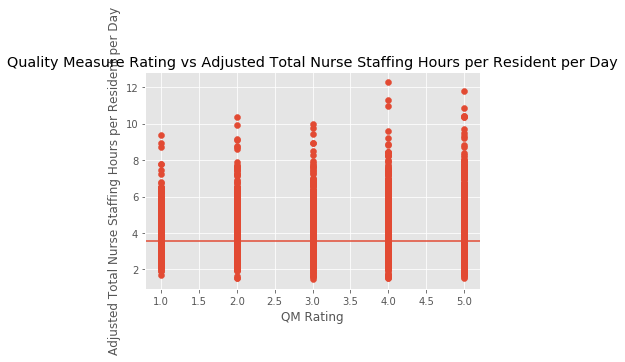

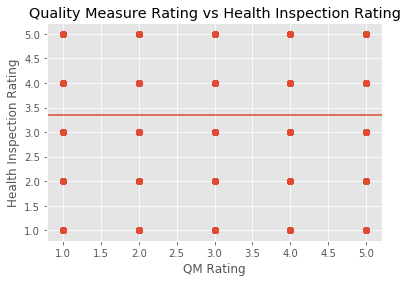

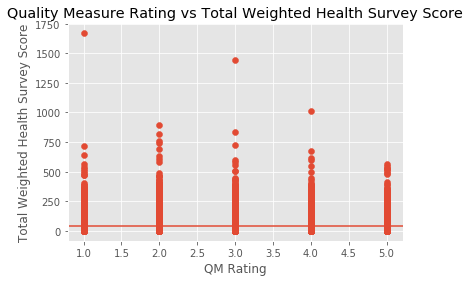

In [111]:
for i in list(merged_df.columns)[1:]:
    columns = merged_df[i]
    fig, ax = plt.subplots()
    ax.set_title('Quality Measure Rating vs ' + i)
    ax.scatter(x=merged_df['QM Rating'], y=merged_df[i])
    ax.axhline(np.mean(columns))
    ax.set_xlabel('QM Rating')
    ax.set_ylabel(i)


#print(list(merged_df.columns)[1:])

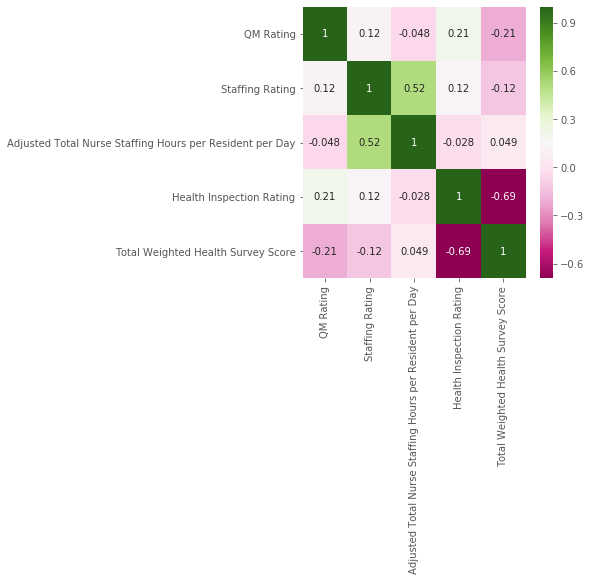

In [90]:
plt.figure(figsize=(5,5))
sns.heatmap(merged_df.corr(), cmap="PiYG", annot=True);